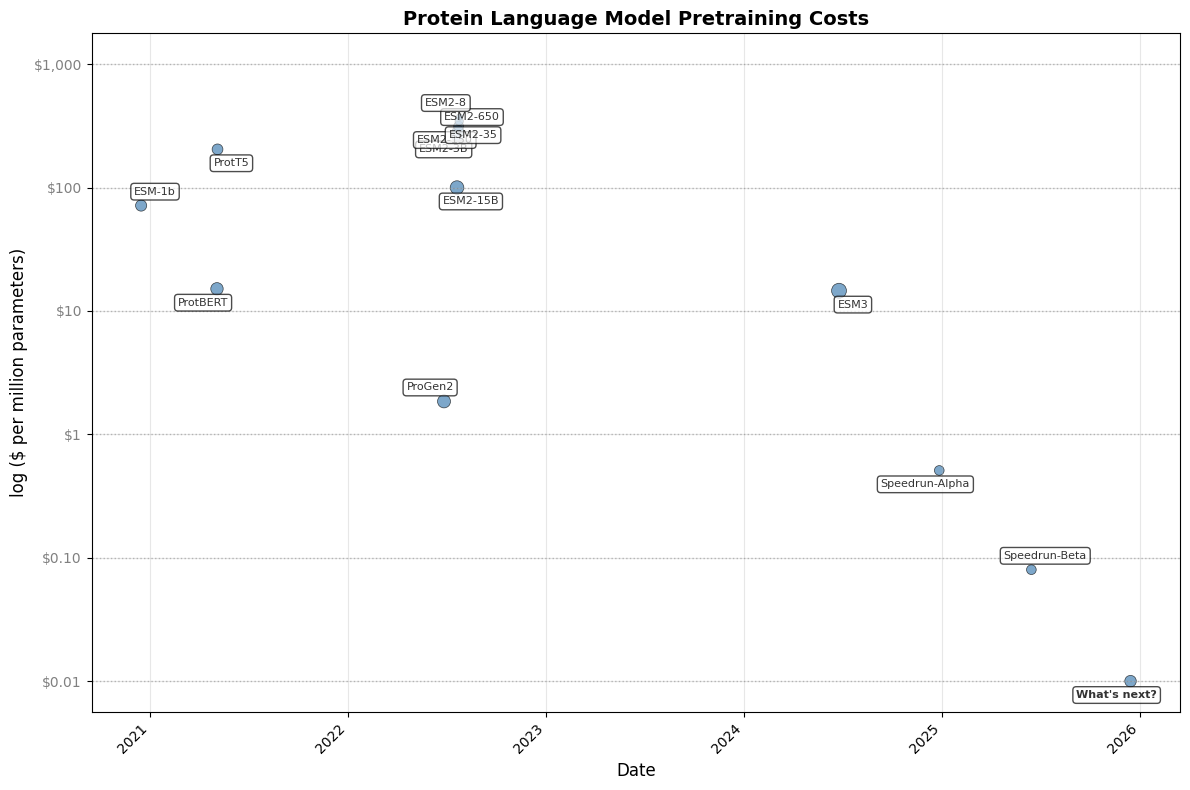

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('misc/model_costs.csv')

# Convert Date column to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Clean up cost columns by removing $ and converting to float
df['Cost'] = df['Cost'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df['CostPerMillionParameters'] = df['CostPerMillionParameters'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
log_cost_per_token = np.log(df['CostPerMillionParameters'])
scale = df['Parameters (million)']
log_scale = np.log(scale) * 10

# Create professional scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Date'], log_cost_per_token, 
                     s=log_scale,  # Scale point size by parameters
                     alpha=0.7, c='steelblue', edgecolors='black', linewidth=0.5)

# Add dotted grey lines at every power of 10 for cost per million tokens, down to 0.1 and 0.01
min_cost = df['CostPerMillionParameters'].min()
max_cost = df['CostPerMillionParameters'].max()
min_exp = int(np.floor(np.log10(min_cost)))
max_exp = int(np.ceil(np.log10(max_cost)))
min_exp = min(min_exp, -2)
powers_of_10 = [10**e for e in range(min_exp, max_exp+1)]
yticks = [np.log(val) for val in powers_of_10]
ytick_labels = []
for val in powers_of_10:
    if val < 1:
        label = f"${val:.2f}"
    else:
        label = f"${int(val):,}"
    ytick_labels.append(label)
    y = np.log(val)
    plt.axhline(y, color='grey', linestyle=':', linewidth=1, alpha=0.5)

# Set y-ticks to the log values and use the cost indicators as labels
plt.yticks(yticks, ytick_labels, fontsize=10, color='grey')

# Add text labels for each point with offset to avoid overlap
for i, model in enumerate(df['Model']):
    # Calculate offset based on position to avoid overlap
    x_offset = 10 if i % 2 == 0 else -10
    y_offset = 10 if i % 3 == 0 else -10

    # Bold the last model name
    if i == len(df['Model']) - 1:
        plt.annotate(model, 
                    (df['Date'].iloc[i], log_cost_per_token.iloc[i]),
                    xytext=(x_offset, y_offset), textcoords='offset points',
                    fontsize=8, alpha=0.8, ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
                    fontweight='bold')
    else:
        plt.annotate(model, 
                    (df['Date'].iloc[i], log_cost_per_token.iloc[i]),
                    xytext=(x_offset, y_offset), textcoords='offset points',
                    fontsize=8, alpha=0.8, ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('log ($ per million parameters)', fontsize=12)
plt.title('Protein Language Model Pretraining Costs', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('misc/model_costs.png', dpi=300)